## Algoritmo de aprendizaje automático - Regresión Lineal | Predicción de ventas en Walmart 

Introducción: La regresión lineal es un modelo de análisis de datos que se utiliza para encontrar la relación entre una variable dependiente (la que queremos predecir) y una o más variables independientes (predictoras). Este modelo asume que existe una relación lineal entre las variables, por lo cual resulta útil para identificar y cuantificar relaciones entre ellas, siendo una herramienta básica pero poderosa en el análisis de datos dentro de Python.

Descripción: En este proyecto, se análiza un dataset obtenido de kaggle (https://www.kaggle.com/datasets/yasserh/walmart-dataset), en el cual se busca predecir las ventas de manera precisa, siendo prudente considerar las demandas inesperadas y en inventario así como un conjunto de variables disponibles. 

Requisitos: Pandas, Numpy, Matplotlib, Seaborn, tabulate, scikit-learn. 

Comando de instalación: pip install pandas numpy matplotlib seaborn tabulate scikit-learn

In [2]:
# Manipulación de datos
import pandas as pd
import numpy as np
from tabulate import tabulate

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importar recursos para aplicar: regresión lineal

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

In [4]:
# Cargar el dataset
walmart_dataset = pd.read_csv('C:/Users/Desktop/Walmart.csv')

### Preparación de los datos 

In [5]:
# Eliminación de espacios en blanco en los nombres de las columnas
walmart_dataset.columns = walmart_dataset.columns.str.strip()

# Imprimir el DataFrame en forma de tabla
print(tabulate(walmart_dataset.head(), headers='keys', tablefmt='pretty'))

+---+-------+------------+--------------+--------------+-------------+------------+-------------+--------------+
|   | Store |    Date    | Weekly_Sales | Holiday_Flag | Temperature | Fuel_Price |     CPI     | Unemployment |
+---+-------+------------+--------------+--------------+-------------+------------+-------------+--------------+
| 0 |   1   | 05-02-2010 |  1643690.9   |      0       |    42.31    |   2.572    | 211.0963582 |    8.106     |
| 1 |   1   | 12-02-2010 |  1641957.44  |      1       |    38.51    |   2.548    | 211.2421698 |    8.106     |
| 2 |   1   | 19-02-2010 |  1611968.17  |      0       |    39.93    |   2.514    | 211.2891429 |    8.106     |
| 3 |   1   | 26-02-2010 |  1409727.59  |      0       |    46.63    |   2.561    | 211.3196429 |    8.106     |
| 4 |   1   | 05-03-2010 |  1554806.68  |      0       |    46.5     |   2.625    | 211.3501429 |    8.106     |
+---+-------+------------+--------------+--------------+-------------+------------+-------------

In [8]:
# Definir las variables predictoras y la variable objetivo
y = walmart_dataset['Weekly_Sales']
predictoras = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = walmart_dataset[predictoras]

In [21]:
# División de datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
# Creación y entrenamiento del modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Generación de predicciones con regresión lineal
lr_predictions = lr_model.predict(X_val)


In [24]:
# Evaluación del modelo de regresión lineal
lr_mse = mean_squared_error(y_val, lr_predictions)
lr_mae = mean_absolute_error(y_val, lr_predictions)
lr_rmse = mean_squared_error(y_val, lr_predictions, squared=False)

print(f'Linear Regression - Mean Squared Error: {lr_mse}')
print(f'Linear Regression - Mean Absolute Error: {lr_mae}')
print(f'Linear Regression - Root Mean Squared Error: {lr_rmse}')

Linear Regression - Mean Squared Error: 274331025616.8762
Linear Regression - Mean Absolute Error: 431992.4178441329
Linear Regression - Root Mean Squared Error: 523766.1936559825


c:\Python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Visualización 

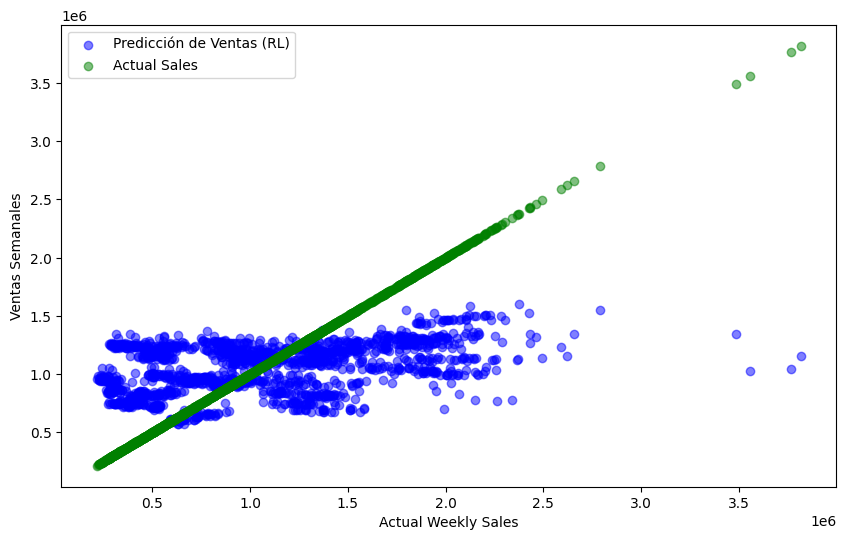

In [28]:
# Visualización de las predicciones y las ventas reales

plt.figure(figsize=(10, 6))
plt.scatter(y_val, lr_predictions, color='blue', alpha=0.5, label='Predicción de Ventas (RL)')
plt.scatter(y_val, y_val, color='green', alpha=0.5, label='Actual Sales')  # Ventas reales
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Ventas Semanales')
plt.legend()
plt.show()


### Comparativa de datos en forma de tabla 

In [27]:
predicciones_df = pd.DataFrame({
    'Weekly_Sales': y_val,  # Valores reales del conjunto de validación
    'Weekly_Sales_Prediction': lr_predictions  # Predicciones del modelo
})

# Redondear los valores a 2 decimales
predicciones_df = predicciones_df.round(2)

# Imprimir el DataFrame con las dos columnas utilizando tabulate
print(tabulate(predicciones_df.head(), headers='keys', tablefmt='pretty'))


+------+--------------+-------------------------+
|      | Weekly_Sales | Weekly_Sales_Prediction |
+------+--------------+-------------------------+
| 2436 |  1138800.32  |       1195114.58        |
| 3361 |  1304850.67  |        1093898.9        |
| 233  |  1769296.25  |       1259206.24        |
| 3667 |  1077640.13  |       1097909.33        |
| 5011 |  428851.99   |        746365.31        |
+------+--------------+-------------------------+


In [13]:
conclusiones_html_colores = """
<p>El análisis del modelo de regresión lineal <span style="color: #32CD32;"><strong>revela varios problemas en su capacidad predictiva</strong></span>.</p>
<p>En primer lugar, el error cuadrático medio (MSE) es <span style="color: #32CD32;"><strong>extremadamente elevado</strong></span>, lo que indica que el promedio entre los valores predichos y los reales es muy grande, sugiriendo que el modelo no está ajustando bien a los datos.</p>
<p>De manera similar, el error medio absoluto (MAE) refleja que, en promedio,<span style="color: #32CD32;"><strong> las predicciones del modelo están desviadas </strong></span>en aproximadamente 432,000 unidades con respecto a los valores reales, lo que <span style="color: #32CD32;"><strong> indica una considerable inexactitud.</strong></span></p>
<p>Finalmente, la raíz del error cuadrático medio (RMSE) confirma que <span style="color: #32CD32;"><strong>las predicciones se encuentran desviadas </strong></span> por más de medio millón de unidades</strong></span> del valor real por observación.</p>
<p>Estos resultados sugieren que el modelo podría beneficiarse de <strong>ajustes adicionales</strong> o incluso de explorar modelos más complejos que capturen mejor las relaciones presentes en los datos.</p>
"""

display(HTML(conclusiones_html_colores))
